# **Smartknower Mini Project**
By: Hussain Imthiaz Hussain

This data science project is based on regression and aims to determine the salary to be given to employees according from their work experience. 

Dataset Used: SalaryData.csv


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()

In [34]:
df = pd.read_csv("./SalaryData.csv")

In [35]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [36]:
df.shape

(30, 2)

In [37]:
df.isnull().values.any()

False

In [38]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [39]:
df_copy = train_set.copy()

In [40]:
df_copy.shape

(24, 2)

In [41]:
df_copy.head()

,YearsExperience,Salary
28,10.3,122391.0
24,8.7,109431.0
12,4.0,56957.0
0,1.1,39343.0
4,2.2,39891.0


In [42]:
df_copy.describe()

,YearsExperience,Salary
count,24.000000,24.000000
mean,5.187500,74207.625000
std,2.943129,28240.733473
min,1.100000,37731.000000
25%,2.975000,55456.750000
50%,4.300000,62164.500000
75%,7.300000,99030.250000
max,10.500000,122391.000000


In [43]:
df_copy.corr()

,YearsExperience,Salary
YearsExperience,1.00000,0.98211
Salary,0.98211,1.00000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


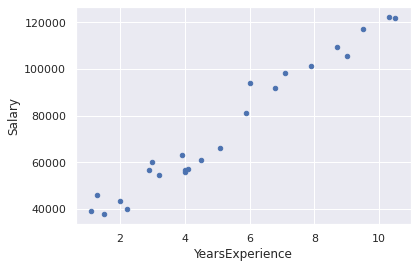

In [44]:
df_copy.plot.scatter(x='YearsExperience', y='Salary')

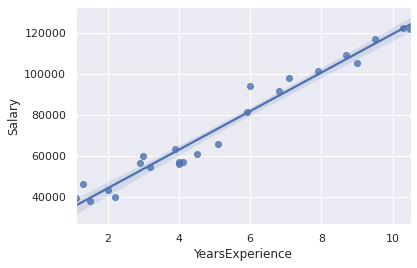

In [45]:
# Regression plot
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=df_copy)

In [46]:
test_set_full = test_set.copy()

test_set = test_set.drop(["Salary"], axis=1)

In [47]:
test_set.head()

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2


In [48]:
train_labels = train_set["Salary"]

In [49]:
train_labels.head()

28    122391.0
24    109431.0
12     56957.0
0      39343.0
4      39891.0
Name: Salary, dtype: float64

In [50]:
train_set_full = train_set.copy()

train_set = train_set.drop(["Salary"], axis=1)

In [51]:
train_set.head()

,YearsExperience
28,10.3
24,8.7
12,4.0
0,1.1
4,2.2


In [52]:
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
salary_pred = lin_reg.predict(test_set)

salary_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [54]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [9423.81532303]
Intercept:  25321.583011776813


In [55]:
print(salary_pred)
print(test_set_full["Salary"])

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]
27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


In [56]:
lin_reg.score(test_set, test_set_full["Salary"])

0.9024461774180497

In [57]:
r2_score(test_set_full["Salary"], salary_pred)

0.9024461774180497

In [71]:
df_results = pd.DataFrame()
df_results['Work Experience']=test_set_full["YearsExperience"]
df_results['Actual Values'] = test_set_full["Salary"]
df_results['Predicted Values'] = salary_pred

Text(0, 0.5, 'Salary')

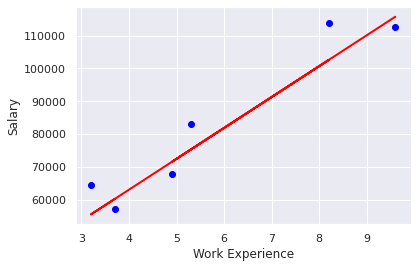

In [75]:
plt.scatter(test_set_full["YearsExperience"], test_set_full["Salary"], color='blue')
plt.plot(test_set_full["YearsExperience"], salary_pred, color='red', linewidth=2)
plt.xlabel("Work Experience")
plt.ylabel("Salary")

The red line indicates the predicted values of the test data and the blue scatter dots represent the actual correct data. Thus, the graph depicts the high accuracy of the predicted values (salary) as compared to the real values from the work experience.

# **Results**

The model was able to predict the salary data based on the work experience with ***~90% accuracy*** as shown below.

In [72]:
df_results #correlates with above graph

,Work Experience,Actual Values,Predicted Values
27,9.6,112635.0,115790.210113
15,4.9,67938.0,71498.278095
23,8.2,113812.0,102596.868661
17,5.3,83088.0,75267.804224
8,3.2,64445.0,55477.792045
9,3.7,57189.0,60189.699707
